<a href="https://colab.research.google.com/github/tanyarw/Image-classification/blob/master/Image_classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [3]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
  os.mkdir('models')

print("Tensorflow version", tf.__version__)
print(tf.config.list_physical_devices('GPU'))

Tensorflow version 2.2.0
[]


Data Preprocessing

In [0]:
#Choode 3 out of 10 from cifar 10 dataset
def get_three_classes(x,y):
  indices_0, _ = np.where(y==0.)
  indices_1, _ = np.where(y==1.)
  indices_2, _ = np.where(y==2.)

  indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)

  x = x[indices]
  y = y[indices]

  count = x.shape[0]

  indices = np.random.choice(range(count), count, replace=False)

  x = x[indices]
  y = y[indices]


  y = tf.keras.utils.to_categorical(y)

  return x,y

In [11]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train,y_train = get_three_classes(x_train, y_train)
x_test,y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


Visualise our example

In [0]:
class_names=['aeroplane','car','bird']

def show_random_examples(x,y,p):
  indices = np.random.choice(range(x.shape[0]), 10, replace=False)

  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    
    #keep image clean
    plt.xticks([])
    plt.yticks([])

    #label colors
    col = 'green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color=col)

  plt.show()



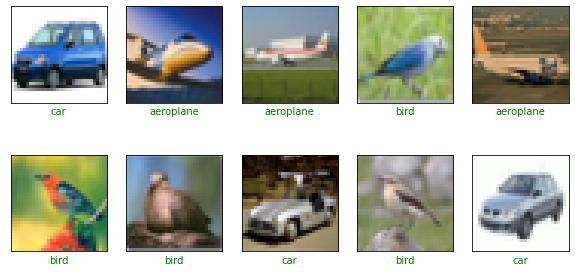

In [17]:
  show_random_examples(x_train, y_train, y_train) #for now we haven't made predictions

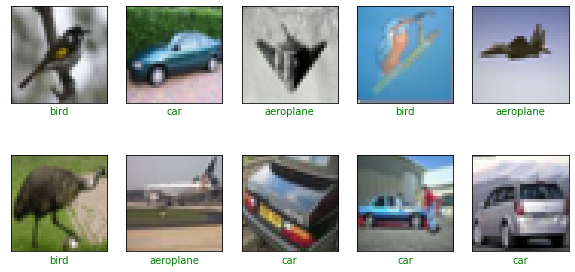

In [18]:
  show_random_examples(x_test, y_test, y_test) #for now we haven't made predictions

Create model

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [0]:
def create_model():
  def add_conv_block(model, num_filters):
    model.add(Conv2D(num_filters, 3, activation= 'relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters, 3, activation= 'relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model

  model = tf.keras.models.Sequential()
  model.add(Input(shape=(32,32,3)))

  model = add_conv_block(model,32)
  model = add_conv_block(model,64)
  model = add_conv_block(model,128)

  model.add(Flatten())
  model.add(Dense(3, activation='softmax'))

  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  return model

In [48]:
model= create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

Train the model

In [51]:
h = model.fit(
	x_train/255.,y_train,
	validation_data=(x_test/255, y_test),
	epochs = 10, batch_size=128,
	callbacks = [
		tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
		tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
		save_best_only = True, save_weights_only = False,
		monitor='val_accuracy'	)	
    ]
)

Epoch 1/10
118/118 [==============================] - 85s 716ms/step - loss: 0.8671 - accuracy: 0.6908 - val_loss: 2.7503 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 84s 714ms/step - loss: 0.5568 - accuracy: 0.7761 - val_loss: 2.9814 - val_accuracy: 0.5433
Epoch 3/10
118/118 [==============================] - 84s 714ms/step - loss: 0.4907 - accuracy: 0.8009 - val_loss: 2.4731 - val_accuracy: 0.4877
Epoch 4/10
118/118 [==============================] - 84s 713ms/step - loss: 0.4401 - accuracy: 0.8265 - val_loss: 2.2341 - val_accuracy: 0.5103
Epoch 5/10
118/118 [==============================] - 84s 716ms/step - loss: 0.3982 - accuracy: 0.8435 - val_loss: 0.9156 - val_accuracy: 0.7013
Epoch 6/10
118/118 [==============================] - 85s 717ms/step - loss: 0.3694 - accuracy: 0.8547 - val_loss: 0.5001 - val_accuracy: 0.8170
Epoch 7/10
118/118 [==============================] - 85s 721ms/step - loss: 0.3441 - accuracy: 0.8676 - val_loss: 0.4552 - val_ac

Final Predictions

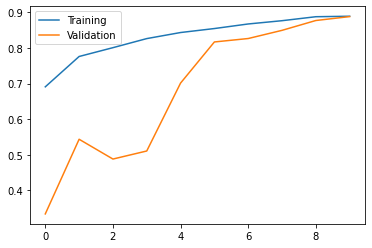

In [55]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)),accs, label='Training' )
plt.plot(range(len(accs)),val_accs, label='Validation' )
plt.legend()

In [0]:
preds = model.predict(x_test/255.)

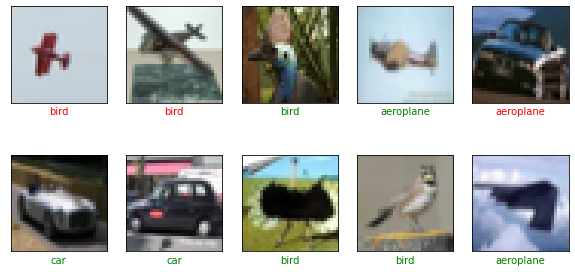

In [62]:
show_random_examples(x_test, y_test, preds)